In [2]:
#data format library
import h5py

#numpy
import numpy as np
import pandas as pd
import numpy.ma as ma
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import matplotlib as mpl
new_rc_params = {'text.usetex': False,
"svg.fonttype": 'none'
}
mpl.rcParams.update(new_rc_params)
plt.rcParams["font.family"] = "Times New Roman"
# %matplotlib notebook
import sys
sys.path.append('/Users/gautam.sridhar/Documents/Repos/Markov_Fish/utils/')
import matplotlib.colors as pltcolors
import os
import copy
import clustering_methods as cl
import operator_calculations as op_calc
import delay_embedding as embed
import stats
import time
import simulation_functions as sfs

np.random.seed(42)

<module 'simulation_functions' from '/Users/gautam.sridhar/Documents/Repos/Markov_Fish/utils/simulation_functions.py'>

## Metastable state simulation sensitivity analysis

In [3]:
path_to_filtered_data = '/Users/gautam.sridhar/Documents/Repos/Markov_Fish/Datasets/JM_Data/'

In [4]:
st_colors = ['#343B97', '#00B4F0', '#FBDD2B', '#8D2B24']

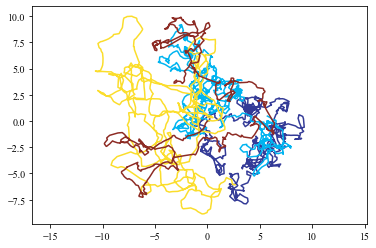

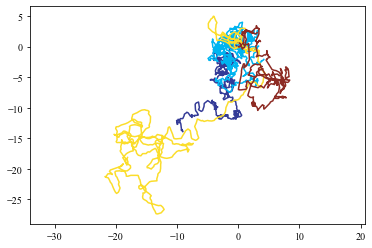

In [5]:
idx=0

for ms in range(4):
    f = h5py.File(path_to_filtered_data + 'zebrafish_ms_sims/sims_lensim_1000_state_{}_{}.h5'.format(ms,idx),'r')
    X_sims = np.array(f['sims_X'])
    f.close()
    plt.plot(X_sims[0][:,0],X_sims[0][:,1],c=st_colors[ms])
    plt.axis('equal')
plt.show()

idx=20

for ms in range(4):
    f = h5py.File(path_to_filtered_data + 'zebrafish_ms_sims/sims_lensim_1000_state_{}_{}.h5'.format(ms,idx),'r')
    X_sims = np.array(f['sims_X'])
    f.close()
    plt.plot(X_sims[0][:,0],X_sims[0][:,1],c=st_colors[ms])
    plt.axis('equal')
plt.show()

### Hunting 

In [6]:
# Fig S5 B1
nbout_range = [3,4,6,10,18,32,57,100,178,317,563,1000]
ac_samples_nbouts=[]
dr=.02
for kn,n_bouts in enumerate(nbout_range):
    ac_samples_state = []
    for ms in range(4):
        print(ms,n_bouts,dr)
        f = h5py.File(path_to_filtered_data + '/zebrafish_ms_sims/est_probs/hunt_probs_state_{}_nbouts_{}_l_{:.2f}.h5'.format(ms,n_bouts,dr),'r')
        ac_samples = np.array(f['ac_samples'])
        f.close()
        ac_samples_state.append(ac_samples)
    ac_samples_state = np.asarray(ac_samples_state)
    ac_samples_nbouts.append(ac_samples_state)
    print(n_bouts)


0 3 0.02
1 3 0.02
2 3 0.02
3 3 0.02
3
0 4 0.02
1 4 0.02
2 4 0.02
3 4 0.02
4
0 6 0.02
1 6 0.02
2 6 0.02
3 6 0.02
6
0 10 0.02
1 10 0.02
2 10 0.02
3 10 0.02
10
0 18 0.02
1 18 0.02
2 18 0.02
3 18 0.02
18
0 32 0.02
1 32 0.02
2 32 0.02
3 32 0.02
32
0 57 0.02
1 57 0.02
2 57 0.02
3 57 0.02
57
0 100 0.02
1 100 0.02
2 100 0.02
3 100 0.02
100
0 178 0.02
1 178 0.02
2 178 0.02
3 178 0.02
178
0 317 0.02
1 317 0.02
2 317 0.02
3 317 0.02
317
0 563 0.02
1 563 0.02
2 563 0.02
3 563 0.02
563
0 1000 0.02
1 1000 0.02
2 1000 0.02
3 1000 0.02
1000


[0.22004968 0.11949101 0.19559279 0.46486652]


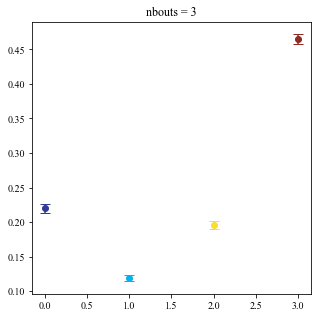

[0.21491824 0.11858537 0.18006356 0.48643273]


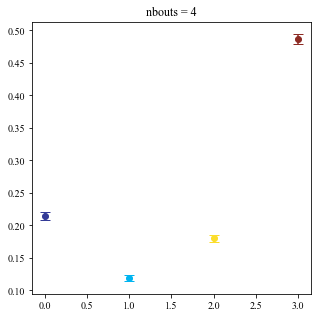

[0.21442704 0.12111652 0.17031178 0.49414474]


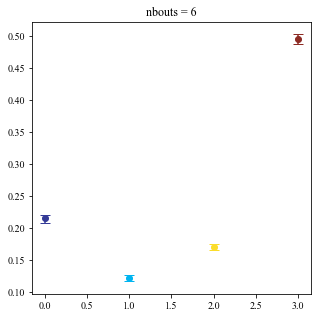

[0.22009443 0.12634766 0.16418523 0.4893726 ]


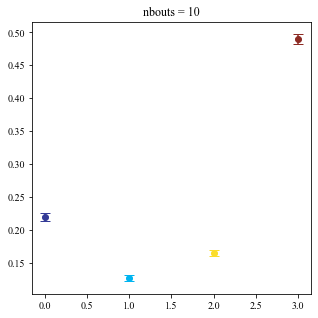

[0.22632772 0.13203272 0.15957238 0.4820672 ]


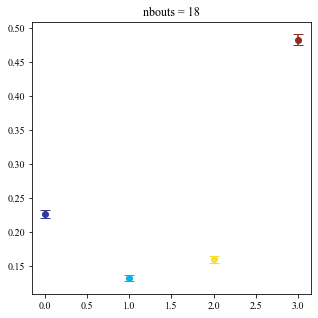

[0.23223017 0.13650823 0.15607046 0.47519112]


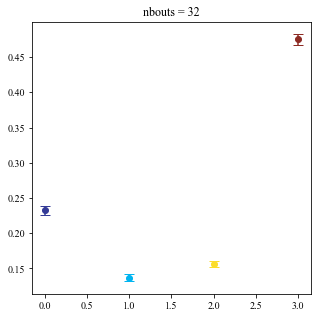

[0.23896518 0.14093405 0.15270145 0.46739927]


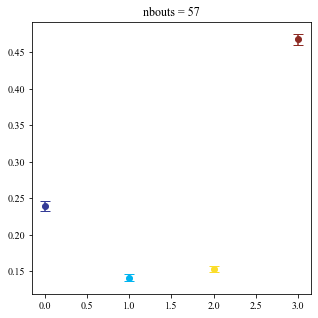

[0.2434543  0.14431526 0.14995119 0.4622792 ]


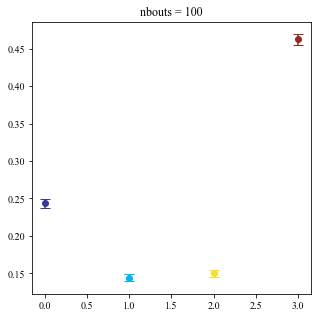

[0.24844134 0.1471385  0.14739649 0.45702368]


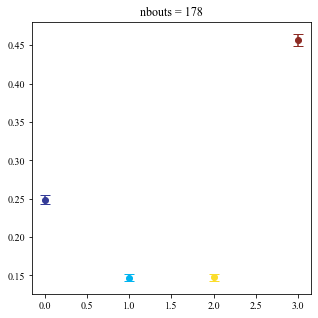

[0.25401324 0.15089853 0.1447275  0.45036072]


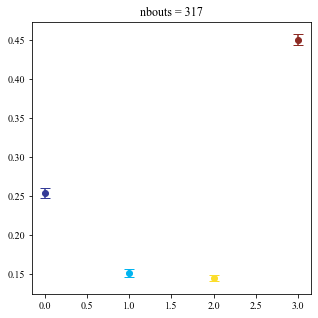

[0.2577929  0.15387419 0.14233665 0.44599625]


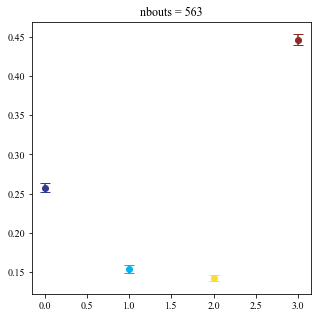

[0.2629385  0.15695296 0.14051439 0.43959415]


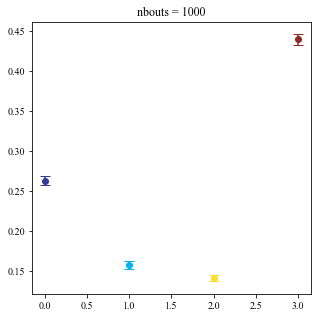

In [7]:
hunt_rate_N = np.zeros((len(nbout_range),4,3))

n_sims = ac_samples_nbouts[0].shape[1]
for kn,n_bouts in enumerate(nbout_range):
    ac_samples_state = ac_samples_nbouts[kn]
    n_times=1000
    mean = ac_samples_state.mean(axis=1)
    mean_norm = mean/mean.sum()
    samples = []
    for k in range(n_times):
        mean_s = ac_samples_state[:,np.random.randint(0,n_sims,n_sims)].mean(axis=1)
        samples.append(mean_s/mean_s.sum())
    cil = np.percentile(samples,2.5,axis=0)
    ciu = np.percentile(samples,97.5,axis=0)
    plt.figure(figsize=(5,5))
    plt.title('nbouts = {}'.format(n_bouts))
    print(mean_norm)
    for ms in np.arange(4):
        plt.errorbar(ms,mean_norm[ms],yerr = [[mean_norm[ms]-cil[ms]],[ciu[ms]-mean_norm[ms]]],color=st_colors[ms],marker='o',capsize=5)
#     plt.savefig('hunt_prob_states_dr_0.02_nbouts_{}.pdf'.format(n_bouts))
    plt.show()
    
    hunt_rate_N[kn] = np.vstack([mean_norm,cil,ciu]).T

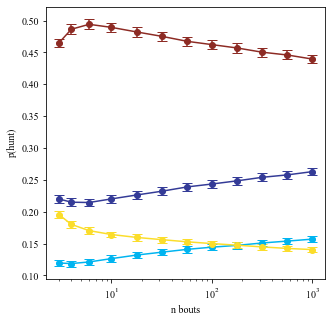

In [9]:
# plt.figure(figsize=(5,5))
# mean = hunt_rate_N[:,:,0]
# cil = hunt_rate_N[:,:,1]
# ciu = hunt_rate_N[:,:,2]
# # plt.plot(nbout_range,hunt_rate_N[:,:,0],marker='o')
# for ms in range(4):
#     plt.errorbar(nbout_range,mean[:,ms],yerr=[mean[:,ms]-cil[:,ms],ciu[:,ms]-mean[:,ms]],c=st_colors[ms],capsize=5,marker='o')
# # plt.xscale('log')
# plt.xlabel('n bouts')
# plt.ylabel('p(hunt)')
# # plt.savefig('hunt_rate_states_nbouts.pdf')
# plt.show()
plt.figure(figsize=(5,5))
mean = hunt_rate_N[:,:,0]
cil = hunt_rate_N[:,:,1]
ciu = hunt_rate_N[:,:,2]
# plt.plot(nbout_range,hunt_rate_N[:,:,0],marker='o')
for ms in range(4):
    plt.errorbar(nbout_range,mean[:,ms],yerr=[mean[:,ms]-cil[:,ms],ciu[:,ms]-mean[:,ms]],c=st_colors[ms],capsize=5,marker='o')
plt.xscale('log')
plt.xlabel('n bouts')
plt.ylabel('p(hunt)')
# plt.savefig('hunt_rate_states_nbouts_log.pdf')
plt.show()

In [10]:
# Fig S5 D1

n_bouts=3
l_range = [.01,.02,.03,.04]
ac_samples_l=[]
for kl,dr in enumerate(l_range):
    ac_samples_state = []

    for ms in range(4):
        f = h5py.File(path_to_filtered_data + 'zebrafish_ms_sims/est_probs/hunt_probs_state_{}_nbouts_{}_l_{:.2f}.h5'.format(ms,n_bouts,dr),'r')
        ac_samples = np.array(f['ac_samples'])
        f.close()
        ac_samples_state.append(ac_samples)
    ac_samples_state = np.asarray(ac_samples_state)
    ac_samples_l.append(ac_samples_state)
    print(dr)

0.01
0.02
0.03
0.04


[0.21990025 0.11695559 0.1890881  0.47405604]


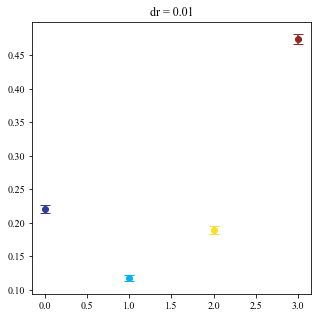

[0.22004968 0.11949101 0.19559279 0.46486652]


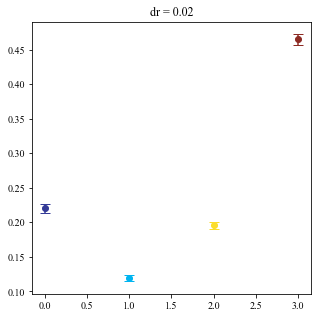

[0.2220169  0.12799376 0.20318386 0.44680548]


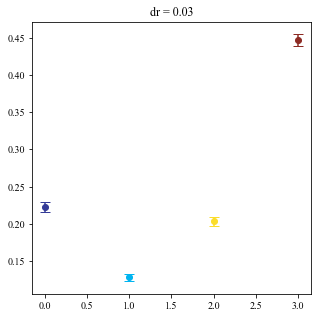

[0.22130713 0.14311017 0.22910026 0.40648243]


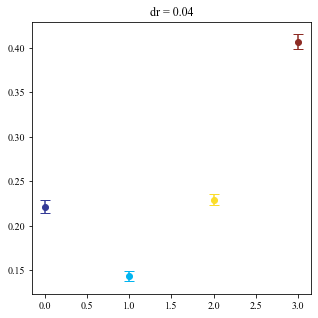

In [11]:
n_sims = ac_samples_l[0].shape[1]
hunt_rate_dr = np.zeros((len(l_range),4,3))
for kl,dr in enumerate(l_range):
    ac_samples_state = ac_samples_l[kl]
    n_times=1000
    mean = ac_samples_state.mean(axis=1)
    mean_norm = mean/mean.sum()
    samples = []
    for k in range(n_times):
        mean_s = ac_samples_state[:,np.random.randint(0,n_sims,n_sims)].mean(axis=1)
        samples.append(mean_s/mean_s.sum())
    cil = np.percentile(samples,2.5,axis=0)
    ciu = np.percentile(samples,97.5,axis=0)
    plt.figure(figsize=(5,5))
    plt.title('dr = {:.2f}'.format(dr))
    print(mean_norm)
    for ms in np.arange(4):
        plt.errorbar(ms,mean_norm[ms],yerr = [[mean_norm[ms]-cil[ms]],[ciu[ms]-mean_norm[ms]]],color=st_colors[ms],marker='o',capsize=5)
#     plt.savefig('hunt_prob_states_dr_{:.2f}_nbouts_1000.pdf'.format(dr))
    plt.show()
    hunt_rate_dr[kl] = np.vstack([mean_norm,cil,ciu]).T

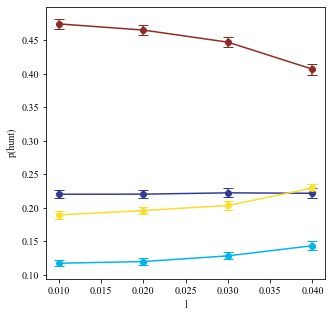

In [12]:
plt.figure(figsize=(5,5))
mean = hunt_rate_dr[:,:,0]
cil = hunt_rate_dr[:,:,1]
ciu = hunt_rate_dr[:,:,2]
# plt.plot(nbout_range,hunt_rate_N[:,:,0],marker='o')
for ms in range(4):
    plt.errorbar(l_range,mean[:,ms],yerr=[mean[:,ms]-cil[:,ms],ciu[:,ms]-mean[:,ms]],c=st_colors[ms],capsize=5,marker='o')
# plt.xscale('log')
plt.xlabel('l')
plt.ylabel('p(hunt)')
# plt.savefig('hunt_rate_states_l.pdf')
plt.show()

### Resource detection

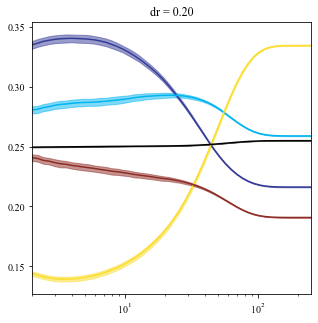

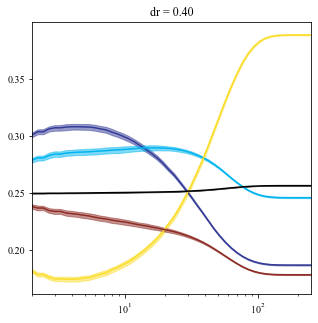

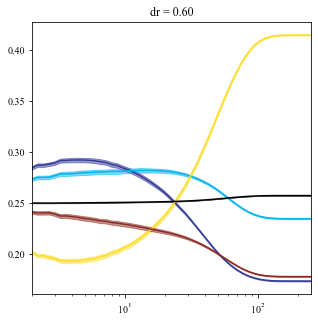

In [14]:
## Fig S5 E1-3

n_bouts=1000
l_range = [.2,.4,.6]
for dr in l_range:
    f = h5py.File(path_to_filtered_data + 'zebrafish_ms_sims/est_probs/bootstrap_detect_probs_states_nbouts_{}_l_{:.2f}.h5'.format(n_bouts,dr),'r')
    mean_ci = np.array(f['mean_ci'])
    mean_ci_avg = np.array(f['mean_ci_avg'])
    dist_range = np.array(f['dist_range'])
    f.close()
    plt.figure(figsize=(5,5))
    plt.title('dr = {:.2f}'.format(dr))
    for ms in np.arange(4):
        mean = mean_ci[:,ms,0]
        cil = mean_ci[:,ms,1]
        ciu = mean_ci[:,ms,2]
        plt.plot(dist_range/0.4,mean, c=st_colors[ms])
        plt.fill_between(dist_range/0.4,cil,ciu,alpha=.5, color=st_colors[ms])

    mean = mean_ci_avg[:,0]
    cil = mean_ci_avg[:,1]
    ciu = mean_ci_avg[:,2]
    plt.plot(dist_range/0.4,mean,c='k')
    plt.fill_between(dist_range/0.4,cil,ciu,alpha=.5,color='k')
    plt.xscale('log')
    plt.xlim(2,250)
#     plt.savefig('detect_probs_states_dr_{:.2f}.pdf'.format(dr))
    # plt.yscale('log')
    plt.show()

## Phenotypic group simulation sensitivity analysis

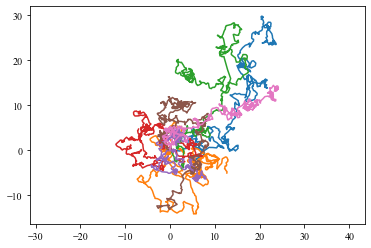

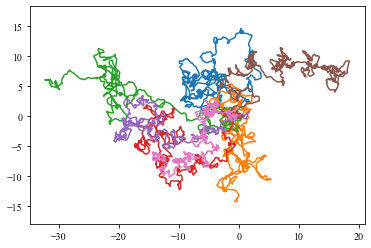

In [15]:
idx=0

for clus in range(7):
    f = h5py.File(path_to_filtered_data + 'zebrafish_ms_sims/sims_lensim_1000_group_{}_{}.h5'.format(clus,idx),'r')
    X_sims = np.array(f['sims_gs_X'])
    f.close()
    plt.plot(X_sims[0][:,0],X_sims[0][:,1],c='C{}'.format(clus))
    plt.axis('equal')
plt.show()

idx=20

for clus in range(7):
    f = h5py.File(path_to_filtered_data+'zebrafish_ms_sims/sims_lensim_1000_group_{}_{}.h5'.format(clus,idx),'r')
    X_sims = np.array(f['sims_gs_X'])
    f.close()
    plt.plot(X_sims[0][:,0],X_sims[0][:,1],c='C{}'.format(clus))
    plt.axis('equal')
plt.show()

### Hunting

In [19]:
#Fig S5 B2
len_sim=1000
# nbout_range = [5,10,20,50,100,500,1000,3162]
nbout_range = [3,4,6,10,18,32,57,100,178,317,563,1000]
ac_samples_nbouts=[]
dr=.02
for kn,n_bouts in enumerate(nbout_range):
    ac_samples_group = []
    for clus in range(7):
        print(clus,n_bouts,dr)
        f = h5py.File(path_to_filtered_data + 'zebrafish_ms_sims/est_probs/hunt_probs_group_{}_lensim_{}_nbouts_{}_l_{:.2f}.h5'.format(clus,len_sim,n_bouts,dr),'r')
        ac_samples = np.array(f['ac_samples'])
        f.close()
        ac_samples_group.append(ac_samples)
    ac_samples_group = np.asarray(ac_samples_group)
    ac_samples_nbouts.append(ac_samples_group)
    print(n_bouts)


0 3 0.02
1 3 0.02
2 3 0.02
3 3 0.02
4 3 0.02
5 3 0.02
6 3 0.02
3
0 4 0.02
1 4 0.02
2 4 0.02
3 4 0.02
4 4 0.02
5 4 0.02
6 4 0.02
4
0 6 0.02
1 6 0.02
2 6 0.02
3 6 0.02
4 6 0.02
5 6 0.02
6 6 0.02
6
0 10 0.02
1 10 0.02
2 10 0.02
3 10 0.02
4 10 0.02
5 10 0.02
6 10 0.02
10
0 18 0.02
1 18 0.02
2 18 0.02
3 18 0.02
4 18 0.02
5 18 0.02
6 18 0.02
18
0 32 0.02
1 32 0.02
2 32 0.02
3 32 0.02
4 32 0.02
5 32 0.02
6 32 0.02
32
0 57 0.02
1 57 0.02
2 57 0.02
3 57 0.02
4 57 0.02
5 57 0.02
6 57 0.02
57
0 100 0.02
1 100 0.02
2 100 0.02
3 100 0.02
4 100 0.02
5 100 0.02
6 100 0.02
100
0 178 0.02
1 178 0.02
2 178 0.02
3 178 0.02
4 178 0.02
5 178 0.02
6 178 0.02
178
0 317 0.02
1 317 0.02
2 317 0.02
3 317 0.02
4 317 0.02
5 317 0.02
6 317 0.02
317
0 563 0.02
1 563 0.02
2 563 0.02
3 563 0.02
4 563 0.02
5 563 0.02
6 563 0.02
563
0 1000 0.02
1 1000 0.02
2 1000 0.02
3 1000 0.02
4 1000 0.02
5 1000 0.02
6 1000 0.02
1000


[0.11992636 0.11683122 0.13712585 0.15001568 0.17505094 0.1416706
 0.15937941]


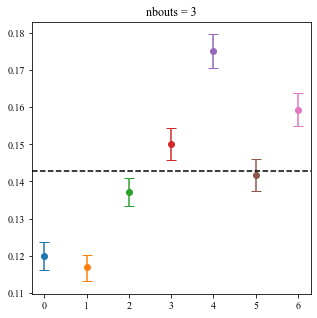

[0.11764277 0.11261654 0.13337703 0.14943908 0.17762965 0.14211829
 0.16717657]


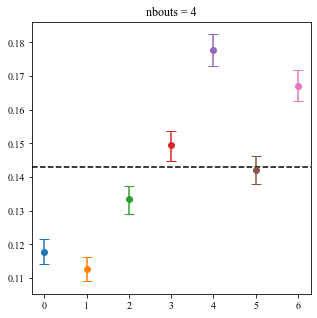

[0.11632986 0.10929321 0.13126972 0.14849734 0.1788277  0.14367914
 0.172103  ]


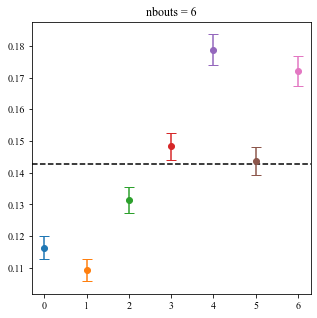

[0.115204   0.10731058 0.12919235 0.14787675 0.17945045 0.14497918
 0.17598666]


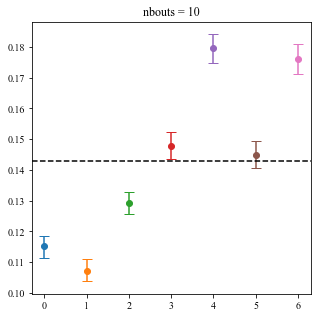

[0.11436051 0.10532532 0.12741841 0.14746822 0.179682   0.14580804
 0.17993742]


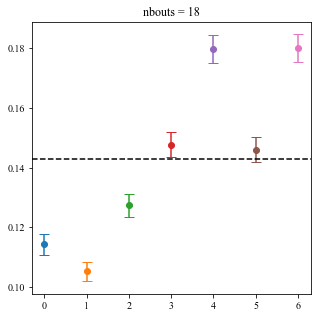

[0.11361617 0.10341553 0.1256854  0.14574973 0.181161   0.14663808
 0.18373412]


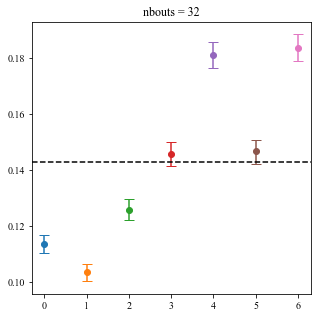

[0.11242551 0.10198242 0.12416662 0.14514132 0.18219364 0.14761934
 0.1864712 ]


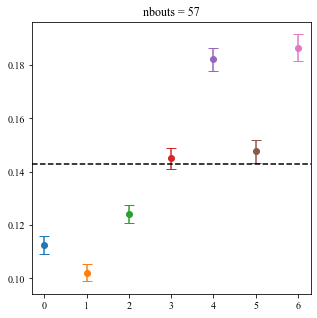

[0.11127242 0.1002562  0.12305722 0.14540279 0.18212356 0.14807858
 0.1898093 ]


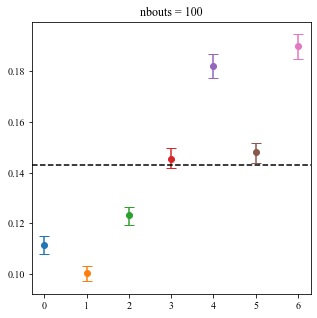

[0.1111539  0.09905102 0.12226653 0.14495943 0.1827259  0.14842527
 0.19141798]


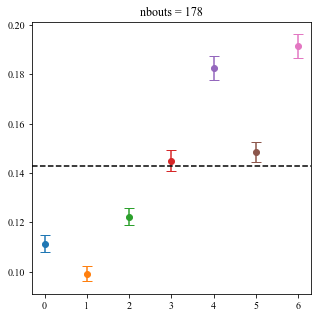

[0.11023477 0.09787098 0.1214261  0.14434172 0.18385783 0.14921793
 0.19305071]


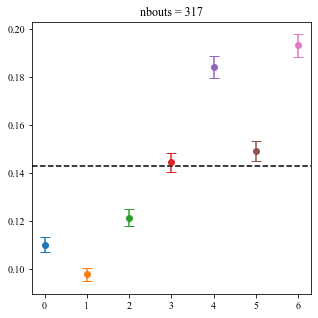

[0.10948925 0.0968042  0.12085669 0.14395331 0.18384273 0.15017955
 0.19487432]


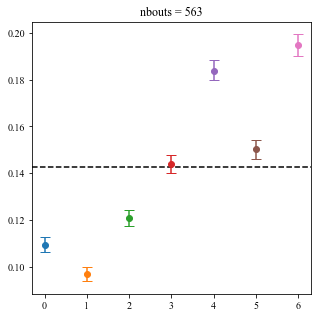

[0.10898384 0.09565216 0.12016039 0.1444681  0.18386166 0.1510838
 0.19579001]


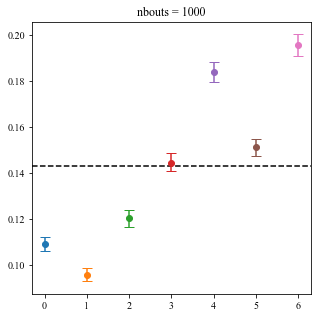

In [20]:
hunt_rate_N = np.zeros((len(nbout_range),7,3))

n_sims = ac_samples_nbouts[0].shape[1]
for kn,n_bouts in enumerate(nbout_range):
    ac_samples_group = ac_samples_nbouts[kn]
    n_times=1000
    mean = ac_samples_group.mean(axis=1)
    mean_norm = mean/mean.sum()
    samples = []
    for k in range(n_times):
        mean_s = ac_samples_group[:,np.random.randint(0,n_sims,n_sims)].mean(axis=1)
        samples.append(mean_s/mean_s.sum())
    cil = np.percentile(samples,2.5,axis=0)
    ciu = np.percentile(samples,97.5,axis=0)
    plt.figure(figsize=(5,5))
    plt.title('nbouts = {}'.format(n_bouts))
    print(mean_norm)
    for kg in np.arange(7):
        plt.errorbar(kg,mean_norm[kg],yerr = [[mean_norm[kg]-cil[kg]],[ciu[kg]-mean_norm[kg]]],color='C{}'.format(kg),marker='o',capsize=5)
#     plt.savefig('hunt_prob_dr_0.02_nbouts_{}.pdf'.format(n_bouts))
    plt.axhline(1/7.,c='k',ls='--')
    plt.show()
    
    hunt_rate_N[kn] = np.vstack([mean_norm,cil,ciu]).T

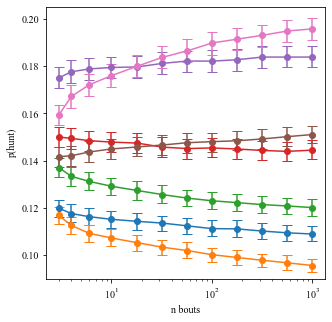

In [21]:
# plt.figure(figsize=(5,5))
# mean = hunt_rate_N[:,:,0]
# cil = hunt_rate_N[:,:,1]
# ciu = hunt_rate_N[:,:,2]
# # plt.plot(nbout_range,hunt_rate_N[:,:,0],marker='o')
# for kg in range(7):
#     plt.errorbar(nbout_range,mean[:,kg],yerr=[mean[:,kg]-cil[:,kg],ciu[:,kg]-mean[:,kg]],c='C{}'.format(kg),capsize=5,marker='o')
# # plt.xscale('log')
# plt.xlabel('n bouts')
# plt.ylabel('p(hunt)')
# plt.savefig('hunt_rate_nbouts.pdf')
# plt.show()
plt.figure(figsize=(5,5))
mean = hunt_rate_N[:,:,0]
cil = hunt_rate_N[:,:,1]
ciu = hunt_rate_N[:,:,2]
# plt.plot(nbout_range,hunt_rate_N[:,:,0],marker='o')
for kg in range(7):
    plt.errorbar(nbout_range,mean[:,kg],yerr=[mean[:,kg]-cil[:,kg],ciu[:,kg]-mean[:,kg]],c='C{}'.format(kg),capsize=5,marker='o')
plt.xscale('log')
plt.xlabel('n bouts')
plt.ylabel('p(hunt)')
plt.ylim(.09,.205)
# plt.savefig('hunt_rate_nbouts_log.pdf')
plt.show()

In [27]:
## Fig S5 C

len_sim=1000
# nbout_range = [5,10,20,50,100,500,1000,3162]
nbout_range = [3,4,6,10,18,32,57,100,178,317,563,1000]
ac_samples_nbouts=[]
dr=.03
for kn,n_bouts in enumerate(nbout_range):
    ac_samples_group = []
    for clus in range(7):
        print(clus,n_bouts,dr)
        f = h5py.File(path_to_filtered_data + 'zebrafish_ms_sims/est_probs/hunt_probs_rmax_0.3_group_{}_lensim_{}_nbouts_{}_l_{:.2f}.h5'.format(clus,len_sim,n_bouts,dr),'r')
        ac_samples = np.array(f['ac_samples'])
        f.close()
        ac_samples_group.append(ac_samples)
    ac_samples_group = np.asarray(ac_samples_group)
    ac_samples_nbouts.append(ac_samples_group)
    print(n_bouts)


0 3 0.03
1 3 0.03
2 3 0.03
3 3 0.03
4 3 0.03
5 3 0.03
6 3 0.03
3
0 4 0.03
1 4 0.03
2 4 0.03
3 4 0.03
4 4 0.03
5 4 0.03
6 4 0.03
4
0 6 0.03
1 6 0.03
2 6 0.03
3 6 0.03
4 6 0.03
5 6 0.03
6 6 0.03
6
0 10 0.03
1 10 0.03
2 10 0.03
3 10 0.03
4 10 0.03
5 10 0.03
6 10 0.03
10
0 18 0.03
1 18 0.03
2 18 0.03
3 18 0.03
4 18 0.03
5 18 0.03
6 18 0.03
18
0 32 0.03
1 32 0.03
2 32 0.03
3 32 0.03
4 32 0.03
5 32 0.03
6 32 0.03
32
0 57 0.03
1 57 0.03
2 57 0.03
3 57 0.03
4 57 0.03
5 57 0.03
6 57 0.03
57
0 100 0.03
1 100 0.03
2 100 0.03
3 100 0.03
4 100 0.03
5 100 0.03
6 100 0.03
100
0 178 0.03
1 178 0.03
2 178 0.03
3 178 0.03
4 178 0.03
5 178 0.03
6 178 0.03
178
0 317 0.03
1 317 0.03
2 317 0.03
3 317 0.03
4 317 0.03
5 317 0.03
6 317 0.03
317
0 563 0.03
1 563 0.03
2 563 0.03
3 563 0.03
4 563 0.03
5 563 0.03
6 563 0.03
563
0 1000 0.03
1 1000 0.03
2 1000 0.03
3 1000 0.03
4 1000 0.03
5 1000 0.03
6 1000 0.03
1000


[0.12864254 0.13058697 0.14357565 0.14938296 0.1616976  0.14147568
 0.1446386 ]


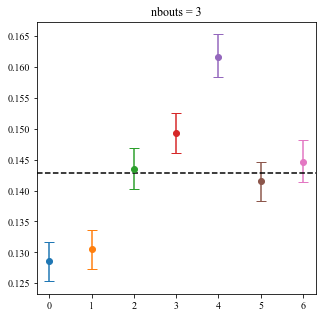

[0.12457116 0.12355122 0.13931386 0.14960593 0.1668521  0.14281408
 0.15329161]


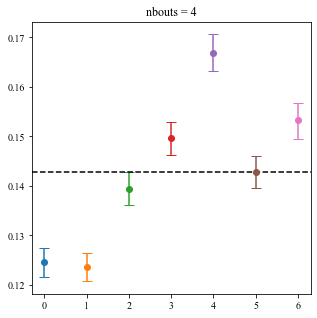

[0.12159818 0.11808663 0.13498062 0.1491553  0.1698392  0.14474446
 0.16159563]


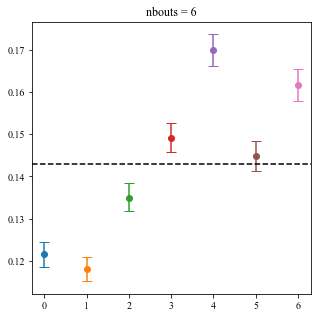

[0.11964138 0.1146336  0.13177717 0.14851685 0.17036529 0.14728509
 0.16778064]


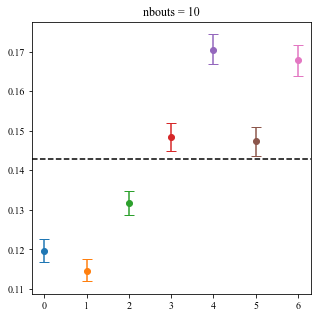

[0.11836136 0.11142246 0.12922719 0.14829005 0.171623   0.14813755
 0.17293836]


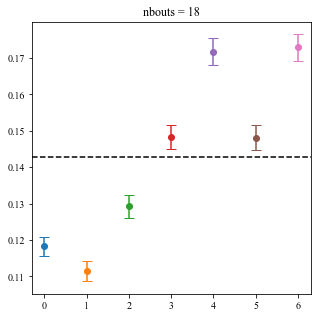

[0.11690563 0.10856297 0.12696378 0.14695367 0.1734624  0.1491567
 0.17799489]


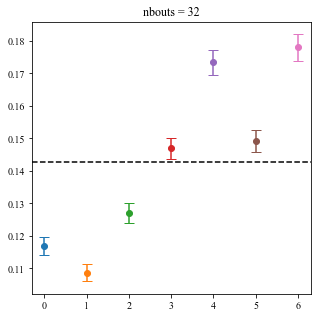

[0.1155045  0.10656655 0.12494188 0.14622763 0.17483251 0.1501369
 0.18179   ]


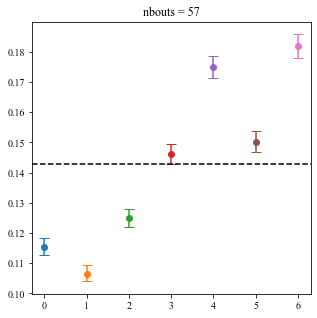

[0.1139788  0.10455323 0.12345375 0.14618698 0.17526977 0.15075997
 0.18579747]


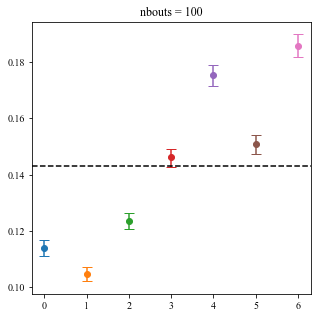

[0.11340547 0.10282096 0.12203688 0.1461513  0.17645578 0.15133332
 0.18779632]


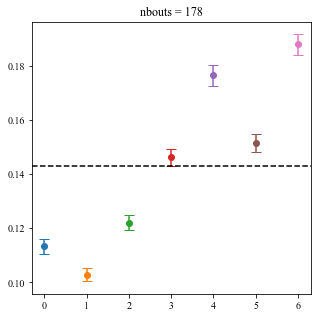

[0.11247899 0.10157635 0.12077711 0.14589864 0.1779706  0.15174367
 0.18955466]


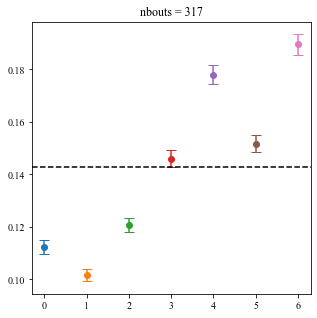

[0.11153358 0.10043266 0.1197063  0.14544818 0.17847413 0.15267397
 0.19173113]


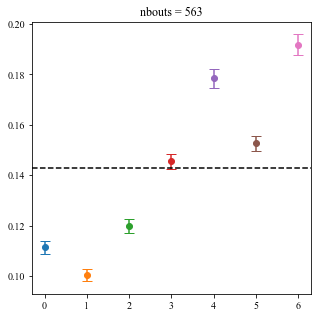

[0.11078059 0.09930263 0.11896109 0.14588802 0.1787363  0.15321256
 0.19311886]


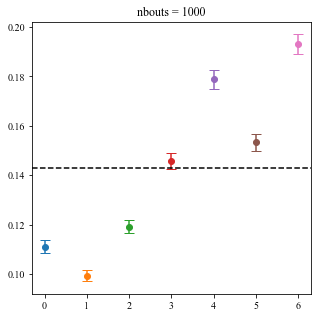

In [28]:
hunt_rate_N = np.zeros((len(nbout_range),7,3))

n_sims = ac_samples_nbouts[0].shape[1]
for kn,n_bouts in enumerate(nbout_range):
    ac_samples_group = ac_samples_nbouts[kn]
    n_times=1000
    mean = ac_samples_group.mean(axis=1)
    mean_norm = mean/mean.sum()
    samples = []
    for k in range(n_times):
        mean_s = ac_samples_group[:,np.random.randint(0,n_sims,n_sims)].mean(axis=1)
        samples.append(mean_s/mean_s.sum())
    cil = np.percentile(samples,2.5,axis=0)
    ciu = np.percentile(samples,97.5,axis=0)
    plt.figure(figsize=(5,5))
    plt.title('nbouts = {}'.format(n_bouts))
    print(mean_norm)
    for kg in np.arange(7):
        plt.errorbar(kg,mean_norm[kg],yerr = [[mean_norm[kg]-cil[kg]],[ciu[kg]-mean_norm[kg]]],color='C{}'.format(kg),marker='o',capsize=5)
#     plt.savefig('hunt_prob_rmax_0.3_dr_0.02_nbouts_{}.pdf'.format(n_bouts))
    plt.axhline(1/7.,c='k',ls='--')
    plt.show()
    
    hunt_rate_N[kn] = np.vstack([mean_norm,cil,ciu]).T

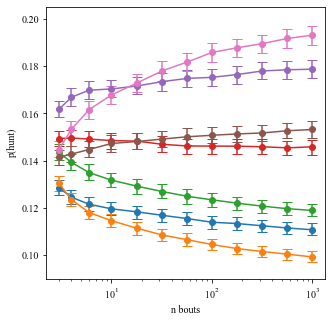

In [30]:
# plt.figure(figsize=(5,5))
# mean = hunt_rate_N[:,:,0]
# cil = hunt_rate_N[:,:,1]
# ciu = hunt_rate_N[:,:,2]
# # plt.plot(nbout_range,hunt_rate_N[:,:,0],marker='o')
# for kg in range(7):
#     plt.errorbar(nbout_range,mean[:,kg],yerr=[mean[:,kg]-cil[:,kg],ciu[:,kg]-mean[:,kg]],c='C{}'.format(kg),capsize=5,marker='o')
# # plt.xscale('log')
# plt.xlabel('n bouts')
# plt.ylabel('p(hunt)')
# # plt.savefig('hunt_rate_nbouts_rmax_0.3.pdf')
# plt.show()
plt.figure(figsize=(5,5))
mean = hunt_rate_N[:,:,0]
cil = hunt_rate_N[:,:,1]
ciu = hunt_rate_N[:,:,2]
# plt.plot(nbout_range,hunt_rate_N[:,:,0],marker='o')
for kg in range(7):
    plt.errorbar(nbout_range,mean[:,kg],yerr=[mean[:,kg]-cil[:,kg],ciu[:,kg]-mean[:,kg]],c='C{}'.format(kg),capsize=5,marker='o')
plt.xscale('log')
plt.xlabel('n bouts')
plt.ylabel('p(hunt)')
plt.ylim(.09,.205)
# plt.savefig('hunt_rate_nbouts_log_rmax_0.3.pdf')
plt.show()

In [16]:
# Fig S5 E2
n_bouts=3
l_range = [.01,.02,.03,.04]
ac_samples_l=[]
for kl,dr in enumerate(l_range):
    ac_samples_group = []

    for clus in range(7):
        f = h5py.File(path_to_filtered_data + 'zebrafish_ms_sims/est_probs/hunt_probs_group_{}_lensim_1000_nbouts_{}_l_{:.2f}.h5'.format(clus,n_bouts,dr),'r')
        ac_samples = np.array(f['ac_samples'])
        f.close()
        ac_samples_group.append(ac_samples)
    ac_samples_group = np.asarray(ac_samples_group)
    ac_samples_l.append(ac_samples_group)
    print(dr)

0.01
0.02
0.03
0.04


[0.11984017 0.11471331 0.13714328 0.14980963 0.1740114  0.14189316
 0.16258906]


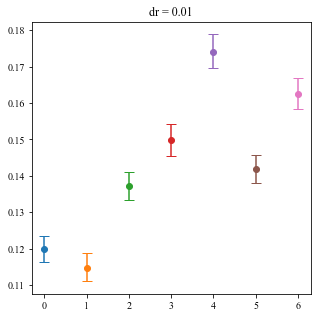

[0.11992636 0.11683122 0.13712585 0.15001568 0.17505094 0.1416706
 0.15937941]


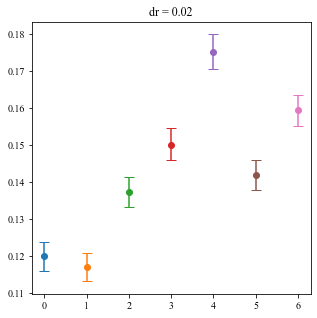

[0.1233511  0.11719228 0.13859525 0.1504761  0.17043768 0.14174017
 0.1582074 ]


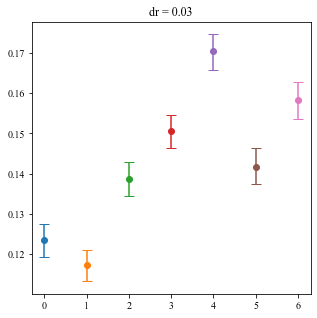

[0.12479405 0.12240235 0.14047302 0.14764816 0.16896093 0.14153601
 0.15418549]


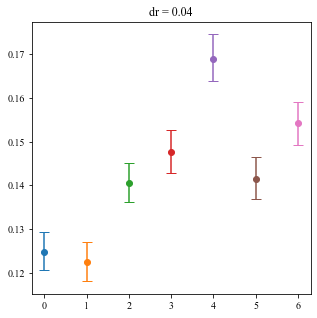

In [17]:
n_sims = ac_samples_l[0].shape[1]
hunt_rate_dr = np.zeros((len(l_range),7,3))
for kl,dr in enumerate(l_range):
    ac_samples_group = ac_samples_l[kl]
    n_times=1000
    mean = ac_samples_group.mean(axis=1)
    mean_norm = mean/mean.sum()
    samples = []
    for k in range(n_times):
        mean_s = ac_samples_group[:,np.random.randint(0,n_sims,n_sims)].mean(axis=1)
        samples.append(mean_s/mean_s.sum())
    cil = np.percentile(samples,2.5,axis=0)
    ciu = np.percentile(samples,97.5,axis=0)
    plt.figure(figsize=(5,5))
    plt.title('dr = {:.2f}'.format(dr))
    print(mean_norm)
    for kg in np.arange(7):
        plt.errorbar(kg,mean_norm[kg],yerr = [[mean_norm[kg]-cil[kg]],[ciu[kg]-mean_norm[kg]]],color='C{}'.format(kg),marker='o',capsize=5)
#     plt.savefig('hunt_prob_dr_{:.2f}_nbouts_1000.pdf'.format(dr))
    plt.show()
    hunt_rate_dr[kl] = np.vstack([mean_norm,cil,ciu]).T

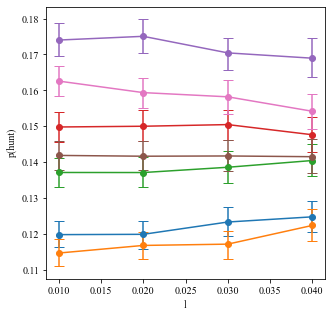

In [18]:
plt.figure(figsize=(5,5))
mean = hunt_rate_dr[:,:,0]
cil = hunt_rate_dr[:,:,1]
ciu = hunt_rate_dr[:,:,2]
# plt.plot(nbout_range,hunt_rate_N[:,:,0],marker='o')
for kg in range(7):
    plt.errorbar(l_range,mean[:,kg],yerr=[mean[:,kg]-cil[:,kg],ciu[:,kg]-mean[:,kg]],c='C{}'.format(kg),capsize=5,marker='o')
# plt.xscale('log')
plt.xlabel('l')
plt.ylabel('p(hunt)')
# plt.savefig('hunt_rate_l_nbouts_3.pdf')
plt.show()

### Resource detection

In [24]:
rmin=0.8
maxR = 100.
dist_range = np.logspace(np.log10(rmin),np.log10(maxR),50)

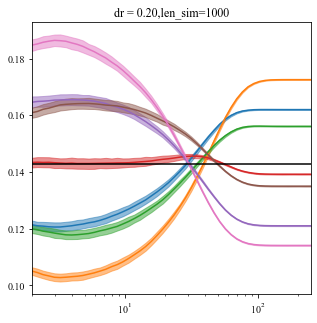

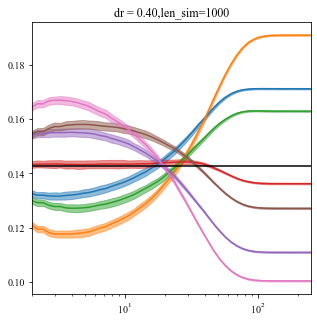

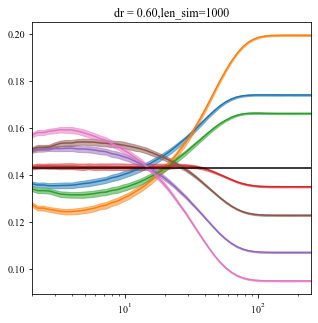

In [26]:
len_sim=1000
l_range = [.2,.4,.6]
for dr in l_range:
    f = h5py.File(path_to_filtered_data + '/zebrafish_ms_sims/est_probs/bootstrap_detect_probs_nbouts_{}_l_{:.2f}.h5'.format(len_sim,dr),'r')
    mean_ci = np.array(f['mean_ci'])
    dist_range = np.array(f['dist_range'])
    f.close()
    plt.figure(figsize=(5,5))
    plt.title('dr = {:.2f},len_sim={}'.format(dr,len_sim))
    for clu in np.arange(7):
        mean = mean_ci[:,clu,0]
        cil = mean_ci[:,clu,1]
        ciu = mean_ci[:,clu,2]
        plt.plot(dist_range/0.4,mean, c='C{}'.format(clu))
        plt.fill_between(dist_range/0.4,cil,ciu,alpha=.5, color='C{}'.format(clu))

    # plt.ylim(0.1,.45)
    plt.axhline(1/7,c='k')
    plt.xscale('log')
    plt.xlim(2,250)
#     plt.savefig('detect_probs_dr_{:.2f}.pdf'.format(dr))
    # plt.yscale('log')
    plt.show()